Linear Regression which is the simplest and most understood ML algorithm, can be divided into two : Simple and Multi Linear Regression.

In simple linear regression, we have two variables namely: independant variable and dependant or target variable. Here we map the relationship between the two variables by representing the target with a function of the dependant variable.

There are numerous ways to perform linear regression on a data set. Here we utilize the below methods to perform gradient descent on a data set.
1) Simple linear regression using Gradient Descent
2) Regression using python library scikit-learn


In the below example we use the data set to predict the target, by performing gradient descent on it. Firstly let us import the dataset and visualize it using seaborn.
The data set is a csv file with just two columns. 1)Total hours spent in studies by individual students 2)The marks scored in exam.
Importing the library numpy library for the same.

In [1]:
import numpy as np
#genfromtxt completes the task in two different loops.
# The first loop converts each line of the file in a sequence of strings.
# The second loop converts each string to the appropriate data type. data_points is a numpy ndarray
data_points = np.genfromtxt('./data.csv', delimiter=',')

In [2]:
print(type(data_points))
print(data_points.shape)

<class 'numpy.ndarray'>
(100, 2)


In [3]:
print(data_points[0:10])

[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]
 [55.14218841 78.21151827]
 [52.21179669 79.64197305]
 [39.29956669 59.17148932]
 [48.10504169 75.3312423 ]
 [52.55001444 71.30087989]]


Visualizing the imported data using seaborn.
Using seaborn, scatterplots are made using the regplot() function. Here is an example showing the most basic utilization of this function. You have to provide at least 2 lists: the positions of points on the X and Y axis. By default, a linear regression fit is drawn, you can remove it with fit_reg=False

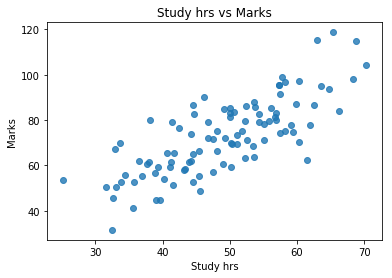

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 
#using the regplot function of seaborn to plot the scatter plot, fit_reg=False to not plot line of best fit
sns.regplot(x=data_points[:,0], y=data_points[:,1],fit_reg=False) 
plt.title('Study hrs vs Marks')  
plt.xlabel('Study hrs')  
plt.ylabel('Marks')  
plt.show()

Now we write the code to perform the gradient descent.

In [5]:
def cost_function_value(c,m, points):
    cost=0
    for i in range (0,len(points)):
        x = points[i,0]
        y = points[i,1]
        cost+=(y - ((m*x)+c))**2
    return cost/(2* len(points))

def cal_new_parameters(c,m,learningrate,num_iter, points):

    for i in range(0,num_iter):
        c_grad = 0
        m_grad = 0
        N=float(len(points))
        for j in range(0,len(points)):
            x = points[j, 0]
            y = points[j, 1]
            #b_gradient += -(2 / N) * (y - ((m_current * x) + b_current))
            #m_gradient += -(2 / N) * x * (y - ((m_current * x) + b_current))
            c_grad +=  ( (( m * x )+ c) - y)
            m_grad +=  ( ((m * x) + c)- y )* x
        c = c - (learningrate * c_grad)/N
        m = m - (learningrate * m_grad)/N
    return [c,m]

def run():
    data_points = np.genfromtxt('C:/Users/Rakesh/Desktop/DataScience/Jupyter Notebooks/data.csv', delimiter=',')
    learning_rate=0.0001
    #Considering the equation of the line of best fit as y=mx+c, we define the following variables
    initial_c=0
    initial_m=0
    num_iterations=1000
    print ('Starting gradient descent. Values c={0},m={1},error={2}'.format(initial_c, initial_m, cost_function_value(initial_c,initial_m,data_points)))
    print('Running...')
    [c,m]= cal_new_parameters(initial_c, initial_m,learning_rate, num_iterations, data_points)
    print('The new parameters calculated after {0} iterations were c={1} and m={2} and error = {3}'.format(num_iterations,round(c,2),round(m,2),cost_function_value(c,m,data_points)))



In [6]:
#Calling the function run to execute the above code
run()

Starting gradient descent. Values c=0,m=0,error=2782.5539172416056
Running...
The new parameters calculated after 1000 iterations were c=0.06 and m=1.48 and error = 56.316335393554716


In the above code, we have obtained the y intercept and slope of the line of best fit, which is obtrained after gradient descent.
Let us now predict the marks obtained by a student who has studied for 30 hours.

In [7]:
print(1.48*30 + 0.06)

44.46


Regression using scikit-learn
Importing the scikit-learn library.

In [65]:
#importing all the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

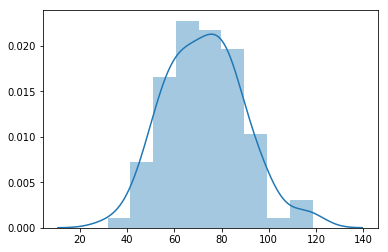

In [39]:
#Plotting the target to understand the distribution
sns.distplot(data_points[:,1])

In [55]:
#Reshaping the arrays from 1d to 2d to pass as input to the fit and predict functions.
# you want a COLUMN vector (many samples, 1 feature), use reshape(-1,1)

X = data_points[:,0]
Y = data_points[:,1]
X= X.reshape(-1,1)
Y= Y.reshape(-1,1)

#train_test_split function allows us to split the dataset into training and test data based on 
#the value defined in the parameter: test_data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [56]:
#Creating and object named reg of the class LinearRegression
reg = LinearRegression()

In [57]:
#Fitting the training data set into the regression model using fit function
#training the algorithm
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

[8.22008375]
[[1.31131611]]


In [59]:
test_pred = reg.predict(X_test)

In [60]:
#Now compare the actual output values for X_test with the predicted values, let us execute the following
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': test_pred.flatten()})
df

,Actual,Predicted
0,56.877213,59.121202
1,81.436192,82.607386
2,61.424710,65.748325
3,50.719589,51.616559
4,85.498068,81.824767
5,71.546632,70.475655
6,44.847124,59.302100
7,58.569825,65.024046
8,62.124571,55.999210
9,70.251934,87.252076


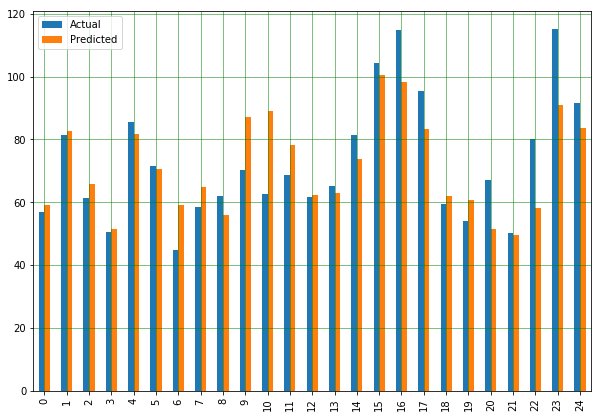

In [62]:
#Let`s plot a bargraph to see the actual vs predicted values of test data set.
df.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

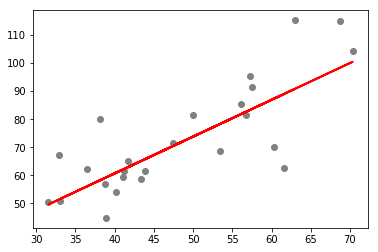

In [63]:
#Though our model is not very precise, the predicted percentages are close to the actual ones. 
#Let's plot our straight line with the test data :
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, test_pred, color='red', linewidth=2)
plt.show()

In [66]:
#Let us calculate the error for the above prediction: We can use any of the following matrices:

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))

Mean Absolute Error: 8.660142276127624
Mean Squared Error: 133.65362030769106
Root Mean Squared Error: 11.560865897833564
